In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from matplotlib.pyplot import *
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/ch/jjy5g6t16pz22hzv3d70ndcw0000gn/T/ipykernel_10189/1606399738.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [4]:
iris = datasets.load_iris()

In [5]:
# Loading the predictor value (y) and remainder of the training dataset (X) as Pandas DataFrames
X = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(data = iris['target'], columns = ['target'])
y = np.ravel(y)

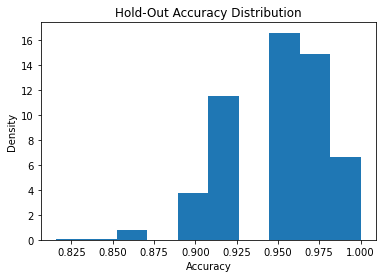

In [6]:
acc_array = np.zeros(1000)
for i in range(1000):
    # Performing a train_test_split on the dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y)
    # Instantiating a RandomForestClassifier model
    rfc_model = RandomForestClassifier()
    # Fitting the X_train and y_train datasets to the RandomForestClassifier model
    rfc_model.fit(X_train, y_train)
    # Getting inferential predictions for the validation dataset
    val_preds = rfc_model.predict(X_val)
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    val_accuracy_ho = accuracy_score(y_val, val_preds)
    acc_array[i] = val_accuracy_ho
    
plt.hist(acc_array,density=True)
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Hold-Out Accuracy Distribution')
plt.show()

In [7]:
# Instantiating the K-Fold cross validation object with 5 folds
k_folds = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [8]:
# Loading the predictor value (y) and remainder of the training dataset (X) as Pandas DataFrames
X = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(data = iris['target'], columns = ['target'])

In [9]:
X_train, X_val = X.iloc[train_index, :], X.iloc[val_index, :]
y_train, y_val = y.iloc[train_index], y.iloc[val_index]
y_train, y_val = np.ravel(y_train),np.ravel(y_val)

NameError: name 'train_index' is not defined

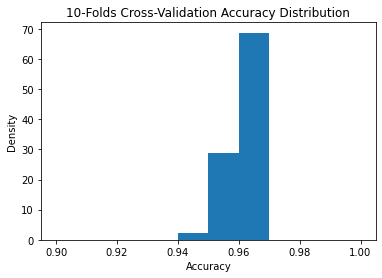

In [10]:
# Iterating through each of the folds in K-Fold
ave_score_array = np.zeros(1000)
for i in range(1000):
    ave_score = 0
    for train_index, val_index in k_folds.split(X):
    
        # Splitting the training set from the validation set for this specific fold
        X_train, X_val = X.iloc[train_index, :], X.iloc[val_index, :]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        y_train, y_val = np.ravel(y_train),np.ravel(y_val)

        # Instantiating a RandomForestClassifier model
        rfc_model = RandomForestClassifier()

        # Fitting the X_train and y_train datasets to the RandomForestClassifier model
        rfc_model.fit(X_train, y_train)

        # Getting inferential predictions for the validation dataset
        val_preds = rfc_model.predict(X_val)

        # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
        val_accuracy = accuracy_score(y_val, val_preds)

        # Printing out the validation metrics
        ave_score += val_accuracy

    ave_score_array[i] = ave_score / 10
plt.hist(ave_score_array,density = True,range = (0.9,1))
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('10-Folds Cross-Validation Accuracy Distribution')
plt.show()